In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
end = pd.to_datetime(['2019-12-17']).astype(int)[0]//10**9 # convert to unix timestamp.
url = 'https://query1.finance.yahoo.com/v7/finance/download/' + 'AAPL' + '?period1=' + str(start) + '&period2=' + str(end) + '&interval=1d&events=history'
df = pd.read_csv(url)
df

<ipython-input-4-09600951579b>:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  start = pd.to_datetime(['2012-01-01']).astype(int)[0]//10**9 # convert to unix timestamp.
<ipython-input-4-09600951579b>:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  end = pd.to_datetime(['2019-12-17']).astype(int)[0]//10**9 # convert to unix timestamp.


,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,14.621429,14.732143,14.607143,14.686786,12.519277,302220800
1,2012-01-04,14.642857,14.810000,14.617143,14.765714,12.586558,260022000
2,2012-01-05,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
3,2012-01-06,14.991786,15.098214,14.972143,15.085714,12.859332,318292800
4,2012-01-09,15.196429,15.276786,15.048214,15.061786,12.838938,394024400
...,...,...,...,...,...,...,...
1997,2019-12-10,67.150002,67.517502,66.464996,67.120003,65.755959,90420400
1998,2019-12-11,67.202499,67.775002,67.125000,67.692497,66.316826,78756800
1999,2019-12-12,66.945000,68.139999,66.830002,67.864998,66.485809,137310400
2000,2019-12-13,67.864998,68.824997,67.732498,68.787498,67.389572,133587600


In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_length = math.ceil(len(dataset) * .8)
training_data_length


1602

In [ ]:
#scale the data
scale = MinMaxScaler(feature_range=(0,1))
scale_data = scale.fit_transform(dataset)
scale_data

array([[0.01319741],
       [0.0146064 ],
       [0.01753279],
       ...,
       [0.96251175],
       [0.97897982],
       [1.        ]])

In [ ]:
#created scaled data set
train_data = scale_data[0:training_data_length, :]
#x y split
x_train = []
y_train = []

for i in range(60, len(train_data)): 
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    

[array([0.01319741, 0.0146064 , 0.01753279, 0.0203189 , 0.01989175,
       0.02085445, 0.02041453, 0.01967498, 0.01866763, 0.02178528,
       0.0245969 , 0.02372984, 0.01898003, 0.02351306, 0.01905017,
       0.03578602, 0.03449178, 0.0361813 , 0.03983448, 0.04204679,
       0.04186192, 0.04117974, 0.04408699, 0.04682209, 0.04992064,
       0.05492545, 0.06543873, 0.06559813, 0.07145091, 0.07582452,
       0.06830777, 0.07120224, 0.07114488, 0.07926097, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.09236911, 0.0968511 ,
       0.09814534, 0.09859803, 0.09093463, 0.08908568, 0.08935985,
       0.09656424, 0.09859166, 0.10294618, 0.11321081, 0.12690551,
       0.12434253, 0.1243489 , 0.13425015, 0.1373487 , 0.13514272,
       0.13312807, 0.13103049, 0.13799896, 0.14278066, 0.14478259])]
[0.13983513293775218]


In [ ]:
#put data into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()
model.add(LSTM(1, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
#test the dataset

print(training_data_length)
#create test set
test_data = scale_data[training_data_length - 60: , : ]
x_test = []
y_test = dataset[training_data_length:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

print(x_test)

In [ ]:
#fit/train the model
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
model.fit(x_train, y_train, batch_size=1, epochs = 1)

1542/1542 [==============================] - 43s 26ms/step - loss: 0.0024


In [ ]:
#Get the predictions

predictions = model.predict(x_test)
predictions = scale.inverse_transform(predictions)

13/13 [==============================] - 1s 12ms/step


In [ ]:
#Get root mean squared error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.5127203449932864

<ipython-input-19-cea8046cba25>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


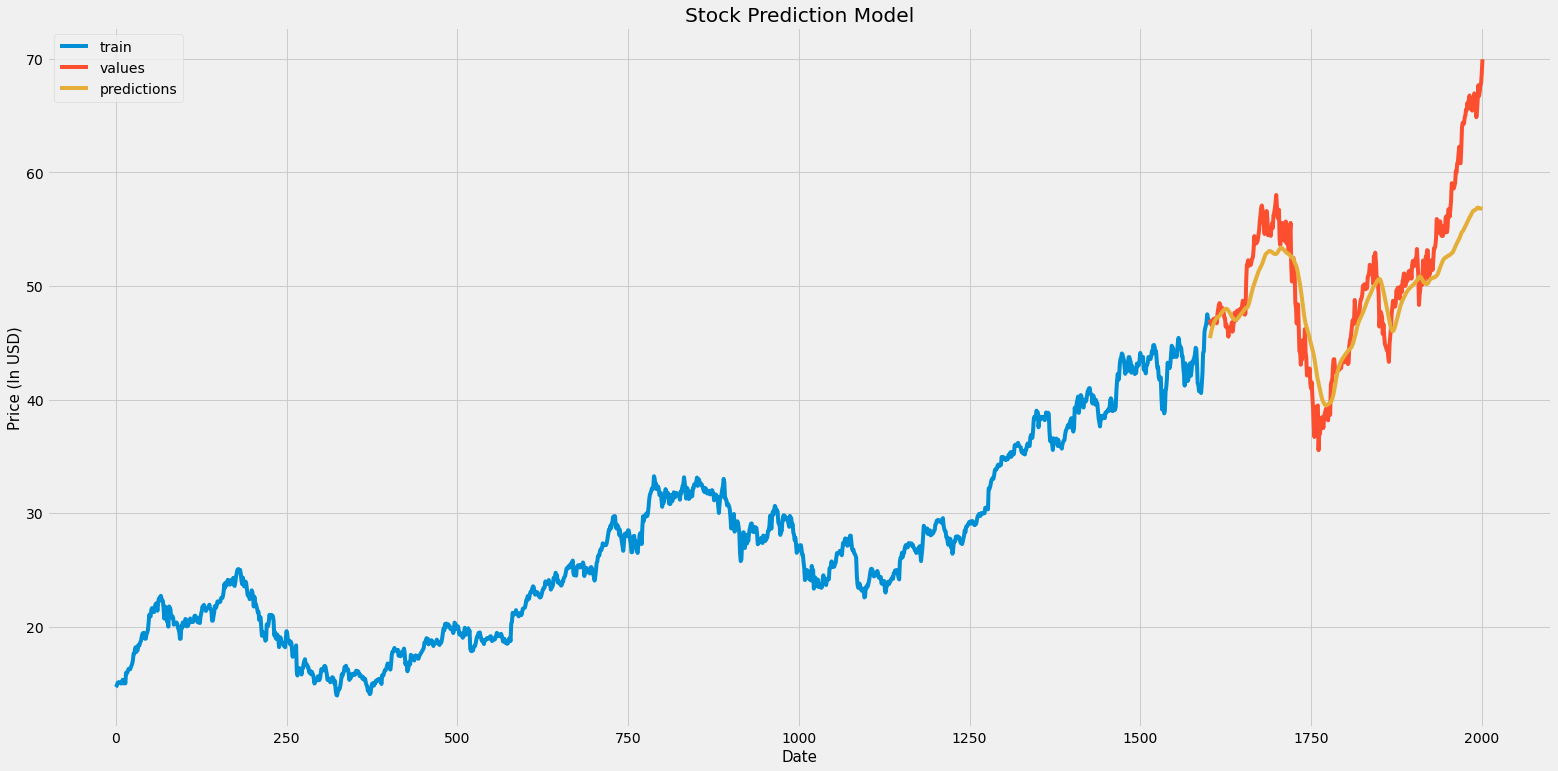

In [ ]:
#plot the data
train = data[:training_data_length]
valid = data[training_data_length:]
valid['predictions'] = predictions
plt.figure(figsize=(24,12))
plt.title('Stock Prediction Model')
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Price (In USD)', fontsize = 15)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['train', 'values', 'predictions'])